# Multivariate Linear and Logistic Regression with Regularization

## Terminology & Symbols

 * Training size (<span style="color:#C63">$m$</span>) - The number of samples we can use for learning
 * Dimensionality (<span style="color:#C63">$d$</span>) - The number of dimensions in the input (feature) space
 * Feature set (<span style="color:#C63">$X$</span>) - An $m \times d$ matrix where every row represents a single feature vector
 * Target (<span style="color:#C63">$y$</span>) - An $m$-vector representing the value we are trying to predict
 * Training set (<span style="color:#C63">$(X,y)$</span>) - The combined matrix of inputs and their associated known target values
 * Test set - An optional set of hold out data used for validation

 * Feature weights (<span style="color:#C63">$\theta$</span>) - the free variables in our modeling
 * Hypothesis function (<span style="color:#C63">$h_{\theta}(x)$</span>) - the function/model we are trying to learn by manipulating $\theta$
 * Loss Function (<span style="color:#C63">$J(\theta)$</span>) - the "error" introduced by our method (What we want to minimize)

## Motivating Problems

### Regression

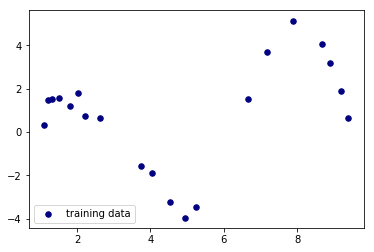

In [348]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(7)

## Setup training data
def f(x):
    """ Magic ground truth function """
    return 5./7. *((np.pi)**2 - (np.pi)**2 + - 0 * 4 +  x * np.sin(x) + 2*(rng.rand(len(x))-0.5))

# generate full validation set of points
X = np.linspace(0, 10, 100)

# select a subset to act as the training data
rng.shuffle(X)
train_X = np.sort(X[:20])
train_y = f(train_X)
validation_y = f(X)

X = np.sort(X)[:, np.newaxis]
train_X = train_X[:, np.newaxis]
train_y = np.atleast_2d(train_y).T

## Plot the training data
plt.scatter(train_X, train_y, color='navy', s=30, marker='o', label="training data")
plt.legend(loc='lower left')



### Classification

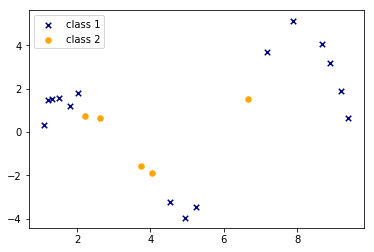

In [352]:
## Threshold the regression data
threshold = 3**2
radius_squared = (train_y)**2 + (train_X-5)**2
idxs1 = np.where(radius_squared > threshold)
idxs2 = np.where(radius_squared <= threshold)

## Plot the training data
plt.scatter(train_X[idxs1], train_y[idxs1], color='navy', s=30, marker='x', label="class 1")
plt.scatter(train_X[idxs2], train_y[idxs2], color='orange', s=30, marker='o', label="class 2")
plt.legend(loc='upper left')
plt.show()

## Linear Regression

### Univariate Linear Regression

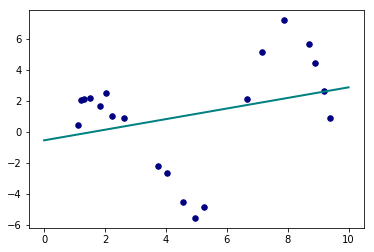

In [212]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X, train_y)
y = model.predict(X)
plt.scatter(train_X, train_y, color='navy', s=30, marker='o', label="training data")
plt.plot(X, y, color='teal', linewidth=lw, label="degree %d" % degree)

Given a training set consisting of one feature, $x$, and one target, $y$, we want to generate a hypothesis $h$ about the linear relationship between $x$ and $y$:

$y \approx h(x) = a + bx$

The bias ($a$) and feature weight ($b$) can be rolled into a single weight vector i.e., $\mathbf{\theta} = \begin{bmatrix} a \\ b\end{bmatrix}$:

$h_{\theta}(x) = \theta_0 + \theta_1 x$

In vector notation (we implicitly prepend a 1 to every x i.e., $\mathbf{x} = \begin{bmatrix} 1 \\ x\end{bmatrix}$):

$h_{\theta}(x) = \mathbf{\theta}^T\mathbf{x}$

One evaluation metric of the quality of fit is by looking at the **cumulative** squared error/residual:

$J(\theta) = \sum_{i=1}^{m}(h_{\theta}(x_i) - y_i)^2$

By minimizing $J$, we get the "best" model. I could make this an average by adding a $\frac{1}{m}$ out front, but it should be clear that this has no effect on where in weight space the minimum lies (it only squashes or stretches $J(\theta)$.

[[ 0.00880092]
 [ 0.25760272]]


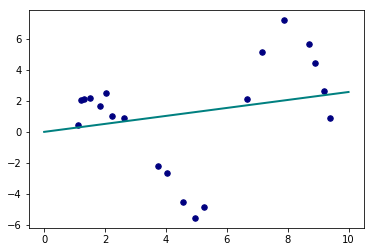

In [263]:
def compute_cost(X, y, theta):
    m = y.shape[1]
    J = np.sum((X.dot(theta)-y.T)**2)/2/m
    return J

def gradient_descent(X, y, theta, alpha, iterations=100):
    X = np.atleast_2d(X)
    y = np.atleast_2d(y)
    theta = np.atleast_2d(theta)
    m = y.shape[1]
    J_history = np.zeros(iterations)
    
    for i in range(iterations):        
        H = X.dot(theta)
        loss = H - y.T
        gradient = X.T.dot(loss) / m
        
        theta = theta - alpha * gradient
        J_history[i] = compute_cost(X, y, theta)
                                
    return theta, J_history

##add bias
train_X_bias = np.hstack((np.ones((train_X.shape[0], 1)), train_X))
validation_X = np.hstack((np.ones((X.shape[0], 1)), X))

initial_theta = np.zeros((train_X_bias.shape[1],1))
final_theta, J_history = gradient_descent(train_X_bias, train_y, initial_theta, 0.01, 20)
print(final_theta)
y_predict = np.dot(validation_X,final_theta)
plt.scatter(train_X, train_y, color='navy', s=30, marker='o', label="training data")
plt.plot(X, y_predict, color='teal', linewidth=lw)

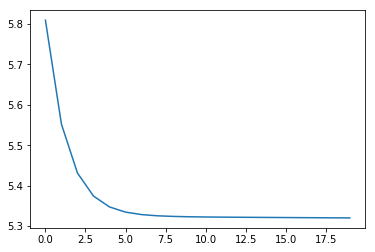

In [264]:
plt.plot(range(len(J_history)), J_history)

### Multivariate Linear Regression

(-10, 10)

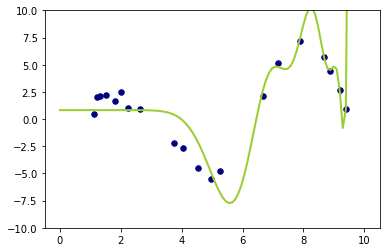

In [94]:
from sklearn.preprocessing import PolynomialFeatures
degree = 25
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(train_X, train_y)
y = model.predict(X)
plt.scatter(train_X, train_y, color='navy', s=30, marker='o', label="training data")
plt.plot(X, y, color='yellowgreen', linewidth=lw, label="degree %d" % degree)
plt.gca().set_ylim(-10,10)

Note, these last two equations do not specify the dimensionality ($d$) of $\theta$ and $x$:

$h_{\theta}(x) = \mathbf{\theta}^T\mathbf{x}$

$J(\theta) = \sum_{i=1}^{m}(h_{\theta}(\mathbf{x_i}) - y_i)^2$

We can adapt our original test case just by adding new parameters: $\mathbf{x} = \begin{bmatrix} 1 \\ x \\ x^2 \\ x^3 \\ x^4 \end{bmatrix}$

The optimum lies where the gradient is zero, we can get there two ways:

 1. Solving the equation analytically
 2. Solving the equation numerically through iteration

#### Closed Form Solution of Ordinary Least Squares

$J(\theta) = \sum_{i=1}^{m}(h_{\theta}(x_i) - y_i)^2$

$J(\theta) = \sum_{i=1}^{m}(\theta^Tx_i - y_i)^2$

The optimum occurs where the gradient is zero:

\begin{align}
\frac{d J(\theta)}{d\mathbf{\theta}} & = 0 \\
2 \sum_{i=1}^{m}\left[\theta^Tx_i - y_i)x_i\right] & = 0 \\
\sum_{i=1}^{m}\left[(\theta^Tx_i)x_i - y_ix_i\right] & = 0 \\
\sum_{i=1}^{m}(\theta^Tx_i)x_i & = \sum_{i=1}^{m}y_ix_i \\
\sum_{i=1}^{m}(x_ix_i^T)\theta & = \sum_{i=1}^{m}y_ix_i \\
\end{align}

Let $A = \sum_{i=1}^{m}(x_ix_i^T) = \mathbf{X}^T \mathbf{X}$

$b=\sum_{i=1}^{m}y_ix_i$ = $\mathbf{X}^T\mathbf{y}$

\begin{align}
A\theta & = b \\
\theta & = A^{-1}b \\
\theta & = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} \\
\end{align}

Note, we are inverting $\mathbf{X}^T \mathbf{X}$ which is $m \times m$, i.e., big with lots of data.


#### Gradient Descent

Recall:

$\frac{d J(\theta)}{d\theta_j} = 2 \sum_{i=1}^{m}\left[\theta^Tx_i - y_i)x_{i,j}\right]$

Represents the gradient of the cost function, so if we want to minimize this, we follow its negative direction.

Algorithm:

> Initialize $\theta_j = \mathbf{0}$ <br>
> Repeat { <br>
>> $\theta_j = \theta_j - \alpha\left(\sum_{i=1}^{m}\left[(\theta^Tx_i - y_i)x_{i,j}\right]\right)$ <br>

> } <br>

We saw last week the benefits of stochastic gradient descent where we don't have to use the whole dataset each time to do the update.

## Feature Scaling

### Why?

Varied dimension "widths" will pull the gradient descent algorithm in wider directions.

### How?

 * Range scaling $\left(\frac{x - x_{min}}{x_{max}- x_{min}}\right)$
 * Z-Score scaling $\left(\frac{x - \mu}{\sigma}\right)$

## Learning Rate

plot # of iterations vs. cost function

## Regularization

$J(\theta) = \sum_{i=1}^{m}(h_{\theta}(\mathbf{x_i}) - y_i)^2 + p(\theta)$

### Ridge Regularization

 * $L_2$ penalty term
 * Tikhonov Regularization
 
 $p(\theta) = \lambda \sum_{i=1}^{m}\theta_i^2$
 
 

/home/maljovec/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


(-10, 10)

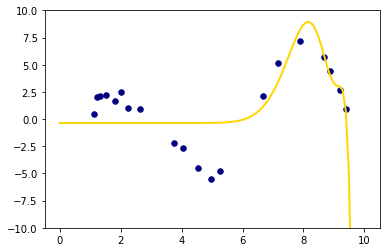

In [87]:
from sklearn.linear_model import Ridge
degree = 25
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(train_X, train_y)
y = model.predict(X)
plt.scatter(train_X, train_y, color='navy', s=30, marker='o', label="training data")
plt.plot(X, y, color='gold', linewidth=lw, label="degree %d" % degree)
plt.gca().set_ylim(-10,10)

### LASSO Regularization

 * $L_1$ penalty term
 * Reduces number of dimensions
 * Good for feature selection
 
 $p(\theta) = \lambda \sum_{i=1}^{m}|\theta_i|$
 

/home/maljovec/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: RuntimeWarning: overflow encountered in square
  positive)
/home/maljovec/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-10, 10)

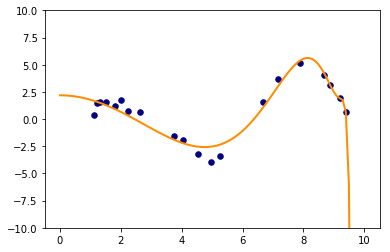

In [376]:
from sklearn.linear_model import Lasso
degree = 300
model = make_pipeline(PolynomialFeatures(degree), Lasso())
model.fit(train_X, train_y)
y = model.predict(X)
plt.scatter(train_X, train_y, color='navy', s=30, marker='o', label="training data")
plt.plot(X, y, color='darkorange', linewidth=lw, label="degree %d" % degree)
plt.gca().set_ylim(-10,10)

### Elastic Net Regularization

 * Combination $L_1$ and $L_2$ Regularization
 
 $p(\theta) = \lambda_1 \sum_{i=1}^{m}|\theta_i| + \lambda_2 \sum_{i=1}^{m}\theta_i^2$

/home/maljovec/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-10, 10)

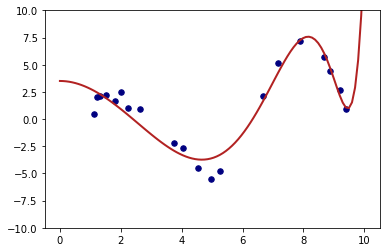

In [92]:
from sklearn.linear_model import ElasticNet
degree = 25
model = make_pipeline(PolynomialFeatures(degree), ElasticNet())
model.fit(train_X, train_y)
y = model.predict(X)
plt.scatter(train_X, train_y, color='navy', s=30, marker='o', label="training data")
plt.plot(X, y, color='firebrick', linewidth=lw, label="degree %d" % degree)
plt.gca().set_ylim(-10,10)

## Logistic Regression

We then formulate our problem such that we are using the sigmoid function to determine the probability that an input resides in a particular class of data. With multiple classes this turns into a "one-vs.-rest" scheme, thus if there are $k$ classes, there are $k$ instances of logistics regression. The highest prediction is taken as the class for that data point.

\begin{align}
h_\theta(x) & = g(\theta^Tx) \\
z & = \theta^Tx \\
g(z) & = \frac{1}{1+e^{-z}}\\ 
\end{align}

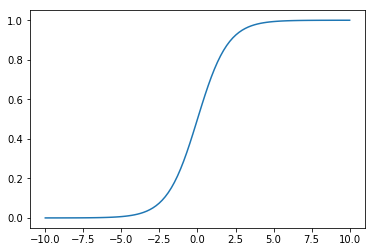

In [307]:
def sigmoid(x):
  return 1. / (1 + np.exp(-x))

xx = np.linspace(-10,10,100)
plt.plot(xx, sigmoid(xx))

We use the sigmoid function to take the discrete output and make it differentiable.

Our $y$ values are discrete (0 or 1). How do we define a cost function for this?

Existing cost function:

$J(\theta) = \sum_{i=1}^{m}(h_{\theta}(x_i) - y_i)^2$

This will not work as it produces a non-convex $J$.

So, we need a convex cost function that has the following properties:
 * When the correct classification is 1, then a zero cost should be assigned to a value of $h(x)$ = 1
 * When the correct classification is 1, then a maximal cost should be assigned to a value of $h(x)$ = 0
 * When the correct classification is 0, then a zero cost should be assigned to a value of $h(x)$ = 0
 * When the correct classification is 0, then a maximal cost should be assigned to a value of $h(x)$ = 1
 
 Thus, we end up with:

$\text{Cost}(h_\theta(x), y) = $
\begin{cases}
    -\log(h_\theta(x)), & \text{if } y = 1\\
    -\log(1 - h_\theta(x)), &  \text{if } y = 0
\end{cases}

We can do this more compactly by using the fact that y is discrete:

$\text{Cost}(h, y) = -y\log(h - (1-y)\log(1 - h)$


This simplifies the gradient needed for gradient descent:

$
\frac{d}{d \theta}J(\theta) = \frac{1}{m} \left(-y^Tlog(h) - (1-y)^Tlog(1-h))\right) 
$

### Regularized Logistic Regression